In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/henrique/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/henrique/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/henrique/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/henrique/.local/lib/python3.6/site-packages/tensorflo

1n6-q8L22cCqwHQ12tVsvxdyBuMDAA7MC


In [3]:
#df = pd.read_csv('PETR3 Dados Históricos.csv' , header=0)
 
df = pd.read_csv('ITSA4 Dados Históricos.csv' , header=0)

#downloaded.GetContentFile('SUZB3 Dados Históricos.csv')  
#df = pd.read_csv('SUZB3 Dados Históricos.csv' , header=0)

df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,02/01/06,1.65,1.62,1.65,1.61,"2,89M","0,61%"
1,03/01/06,1.71,1.65,1.72,1.64,"7,62M","3,64%"
2,04/01/06,1.75,1.71,1.78,1.71,"9,86M","2,34%"
3,05/01/06,1.72,1.73,1.77,1.72,"8,99M","-1,71%"
4,06/01/06,1.76,1.74,1.77,1.73,"8,84M","2,33%"


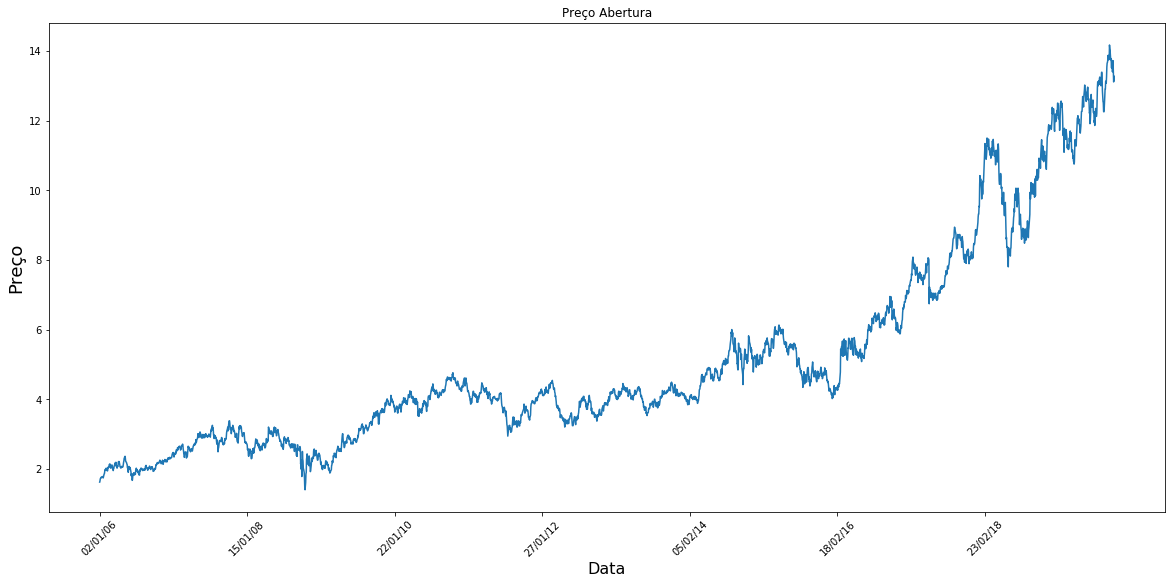

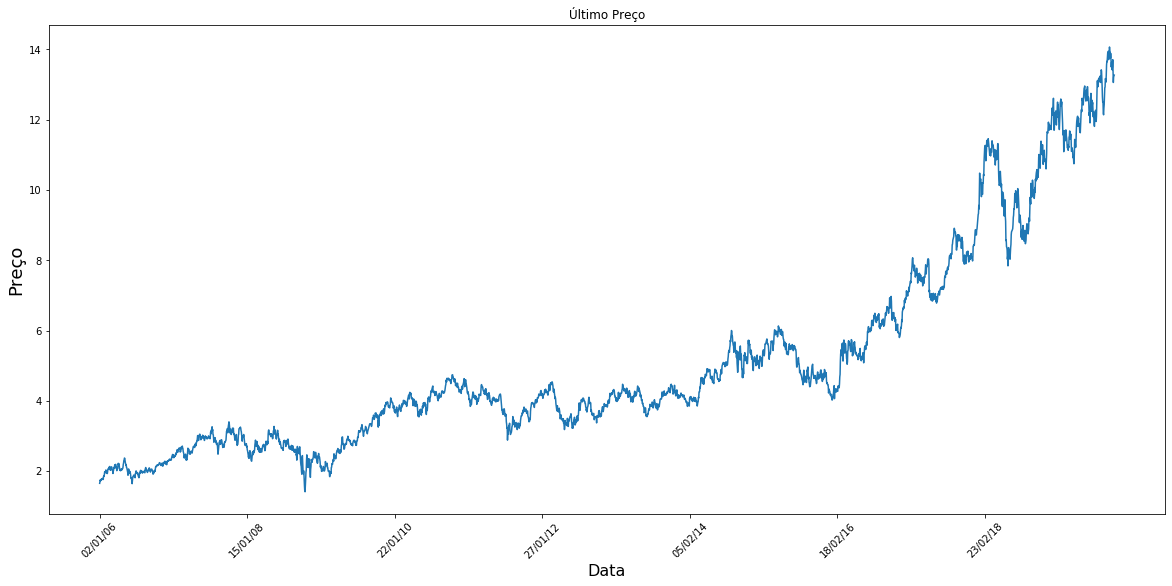

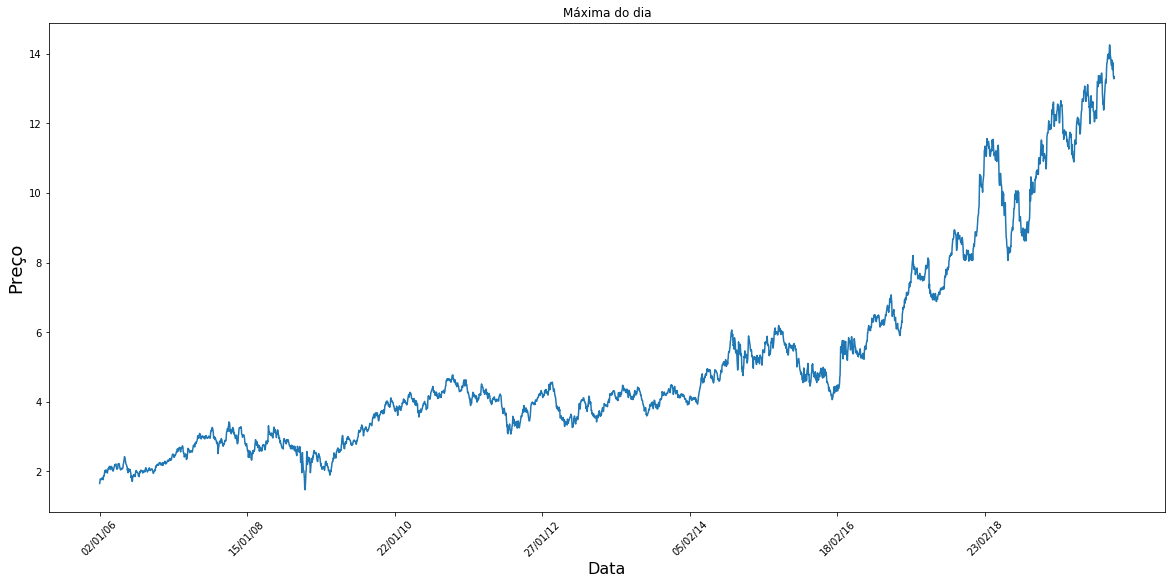

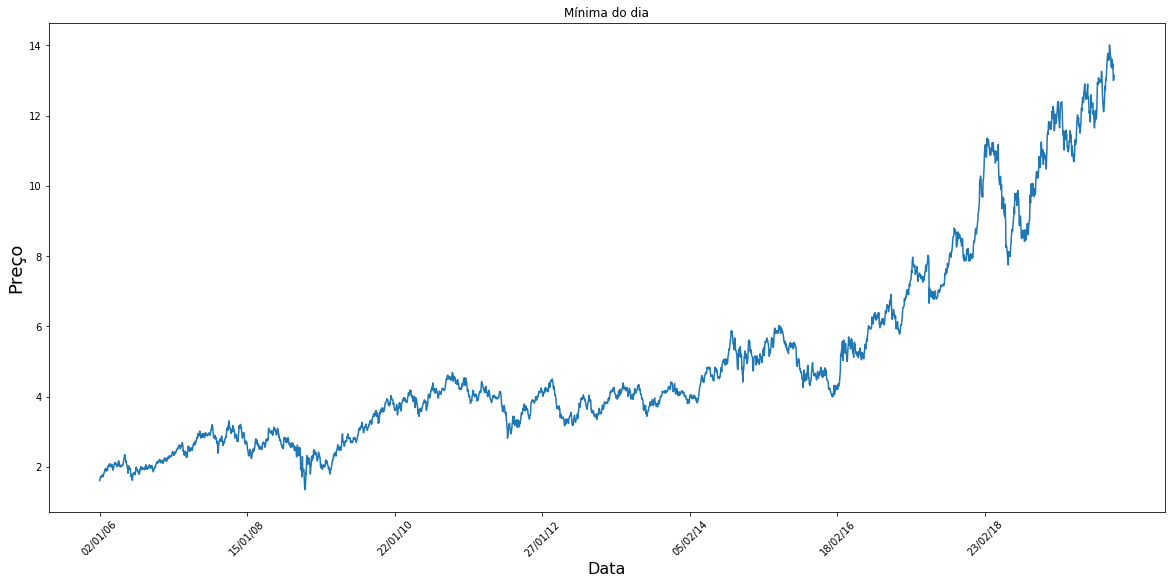

In [4]:
plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),(df['Abertura']))
plt.xticks(range(0,df.shape[0],500),df['Data'].loc[::500],rotation=45)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Preço',fontsize=18)
plt.title('Preço Abertura')
plt.show()

plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),(df['Último']))
plt.xticks(range(0,df.shape[0],500),df['Data'].loc[::500],rotation=45)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Preço',fontsize=18)
plt.title('Último Preço')
plt.show()

plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),(df['Máxima']))
plt.xticks(range(0,df.shape[0],500),df['Data'].loc[::500],rotation=45)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Preço',fontsize=18)
plt.title('Máxima do dia')
plt.show()

plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),(df['Mínima']))
plt.xticks(range(0,df.shape[0],500),df['Data'].loc[::500],rotation=45)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Preço',fontsize=18)
plt.title('Mínima do dia')
plt.show()

In [5]:
# fix random seed para reprodução
numpy.random.seed(10)

dataset = df['Abertura']
dataset = dataset.astype('float32')

In [6]:
data = dataset.values

In [7]:
# normalizando os dados
data= data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [8]:
# dividir em treino e teste
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

2407 1032


In [9]:
# conversão um array de valores em uma matriz
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape em X=t and Y=t+look_back
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape entrada em [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# Criação da rede
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2, batch_size=1, verbose=2)


Epoch 1/2
 - 6s - loss: 0.0038
Epoch 2/2
 - 7s - loss: 7.1169e-05


In [13]:
# predições
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# inverter predições
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculo do RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Teste: %.2f RMSE' % (testScore))

Treino: 0.09 RMSE
Teste: 0.36 RMSE


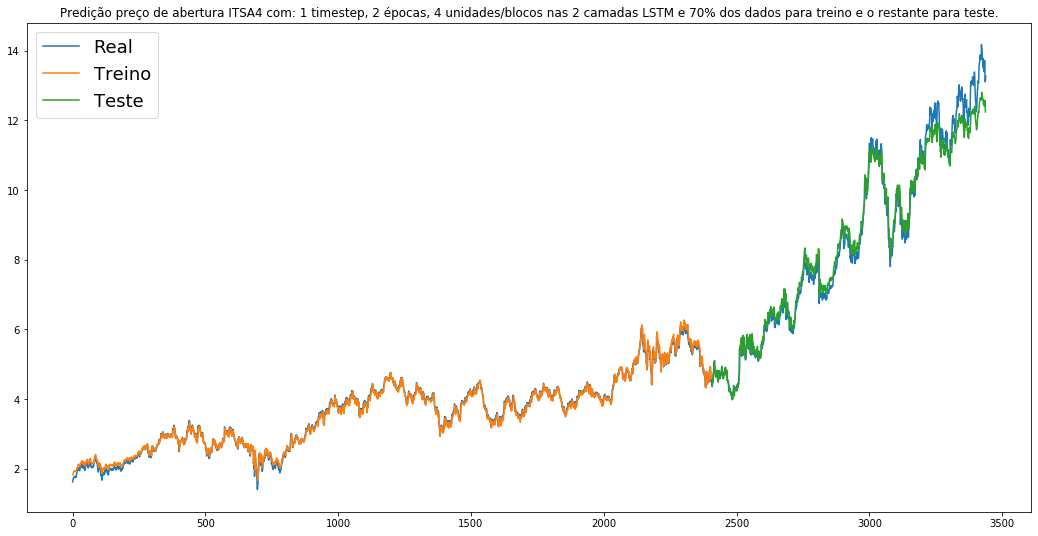

In [14]:
# plotagem dos gráficos
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

plt.figure(figsize = (18,9))
plt.plot(scaler.inverse_transform(data), label = 'Real')
plt.plot(trainPredictPlot, label = 'Treino')
plt.plot(testPredictPlot, label = 'Teste')
plt.title("Predição preço de abertura ITSA4 com: 1 timestep, 2 épocas, 4 unidades/blocos nas 2 camadas LSTM e 70% dos dados para treino e o restante para teste.")
plt.legend(fontsize=18)
plt.show()